# Akash patil
aakashgolu1008@gmail.com

## Clustering 

## (Hierarchical, Kmeans & DBSCAN) for the crime dataset

## Hierarchical

### What is Hierarchical Clustering?
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

### Steps to Perform Hierarchical Clustering:

At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.

Form a cluster by joining the two closest data points resulting in K-1 clusters.

Form more clusters by joining the two closest clusters resulting in K-2 clusters.

Repeat the above three steps until one big cluster is formed.
Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem.

### import the Libraeris

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and Understanding the data 

In [3]:
crime=pd.read_csv("crime_data.csv")
crime.sample(n=10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
8,Florida,15.4,335,80,31.9
32,North Carolina,13.0,337,45,16.1
30,New Mexico,11.4,285,70,32.1
38,Rhode Island,3.4,174,87,8.3
28,New Hampshire,2.1,57,56,9.5
42,Texas,12.7,201,80,25.5
46,Washington,4.0,145,73,26.2
23,Mississippi,16.1,259,44,17.1
10,Hawaii,5.3,46,83,20.2
47,West Virginia,5.7,81,39,9.3


In [4]:
# rows and columns we get
print(f'crime dataset contains {crime.shape[0]} rows and {crime.shape[1]} columns')

crime dataset contains 50 rows and 5 columns


In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

crime dataset no missing values

In [7]:
crime.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [10]:
# Rename the column name Unnamed:0 as State
crime=crime.rename(columns={'Unnamed: 0': 'State'})

In [12]:
crime.tail()

,State,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


### 1) Murder Rate

<AxesSubplot: xlabel='State'>

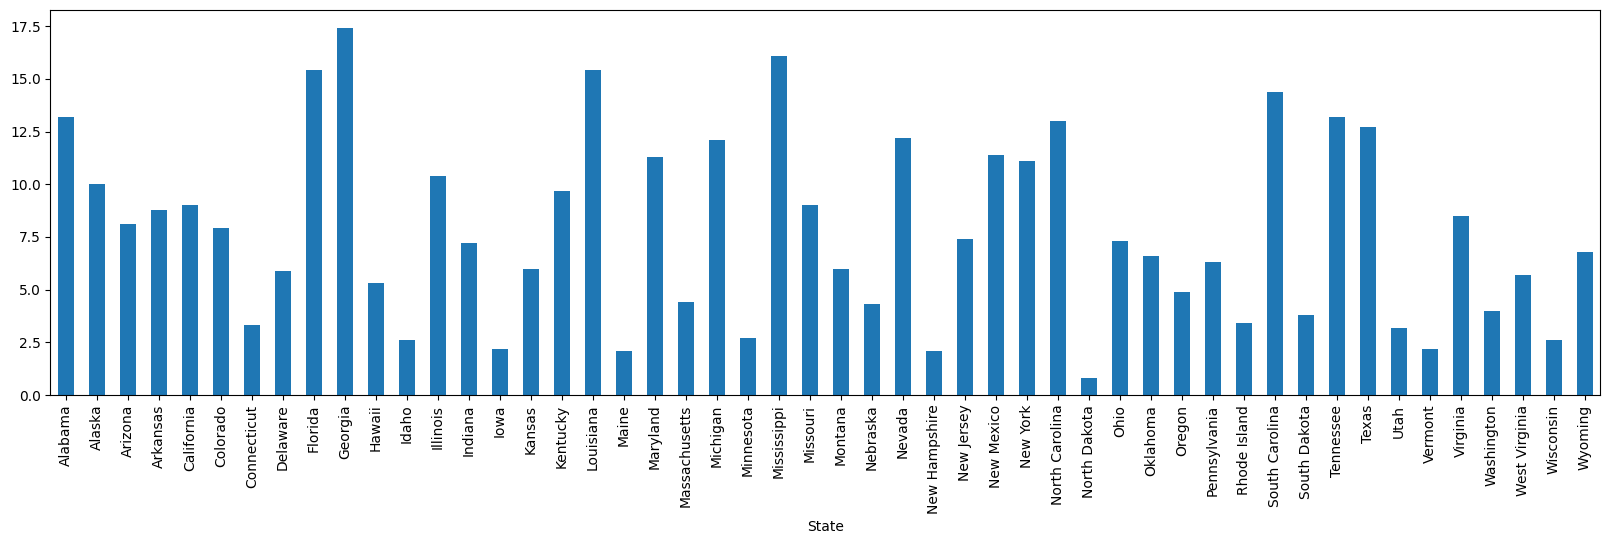

In [17]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Murder'].max().plot(kind='bar')

Highest Murder Rate : Georgia, Missisippi,Florida and Louisiana

Lowest Murder Rate : Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.

### 2) Assault Rate

<AxesSubplot: xlabel='State'>

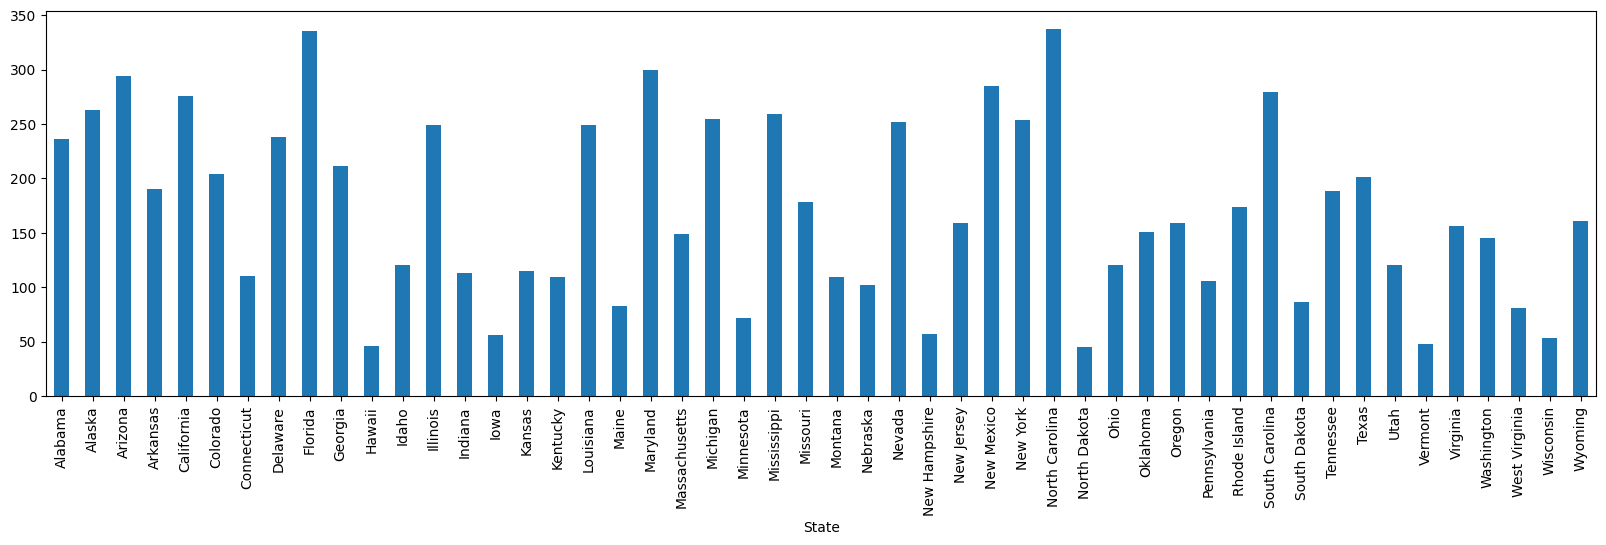

In [24]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Assault'].max().plot(kind='bar')

Highest Assualt Rate : Florida and North California.

Lowest Assualt Rate : Hawaii, North Dakota, Vermont , New Hampshire and Wisconsin.

### 3) UrbanPop

<AxesSubplot: xlabel='State'>

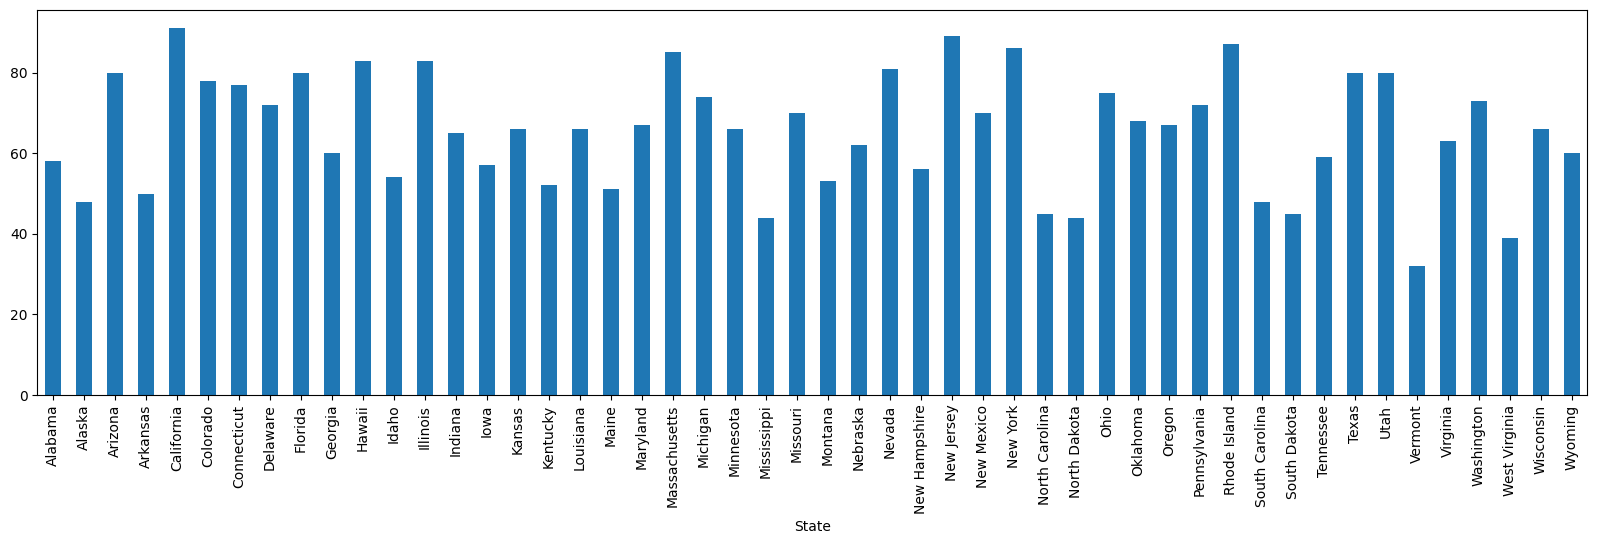

In [27]:
plt.figure(figsize=(20,5))
crime.groupby('State')['UrbanPop'].max().plot(kind='bar')

### 4) Rape

<AxesSubplot: xlabel='State'>

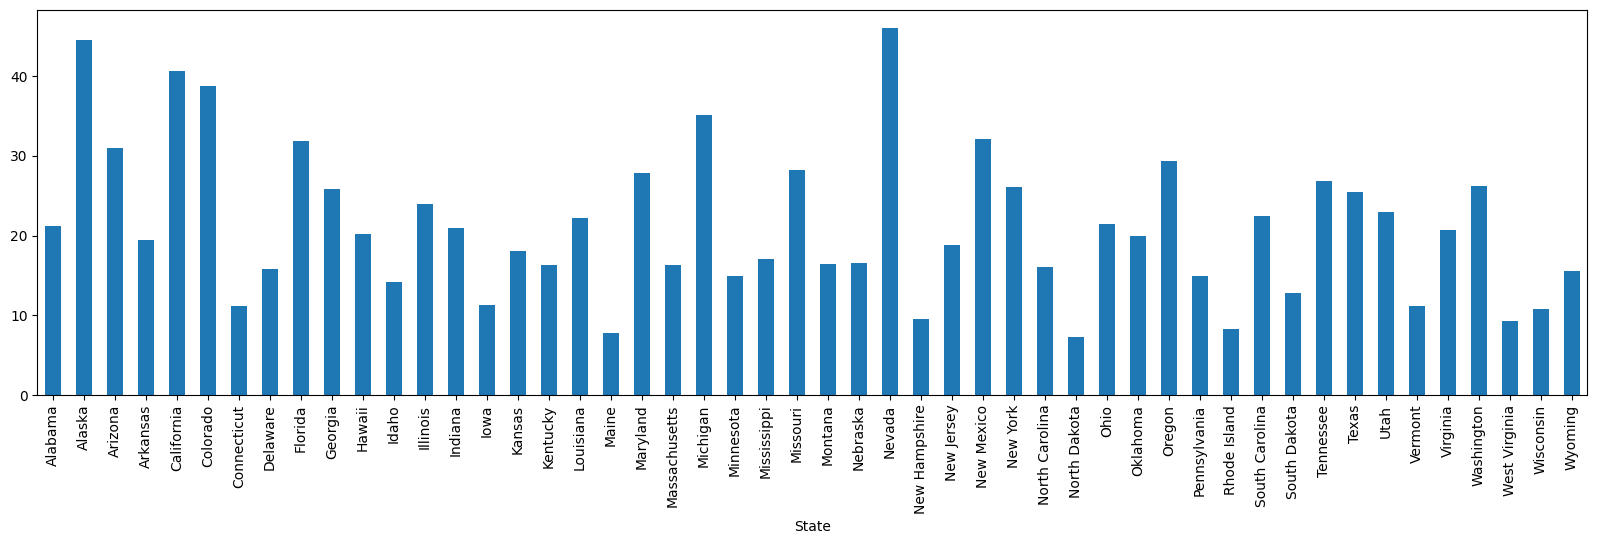

In [28]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Rape'].max().plot(kind='bar')

Highest UrbanPop Rate : Nevada and Alaska.

Lowest UrbanPop Rate : Maine, North Dakota,Vermont,Connecticut,New Hampshire, Wisconsin,Rhode Island and West Virginia

Text(0, 0.5, 'Murder Rate')

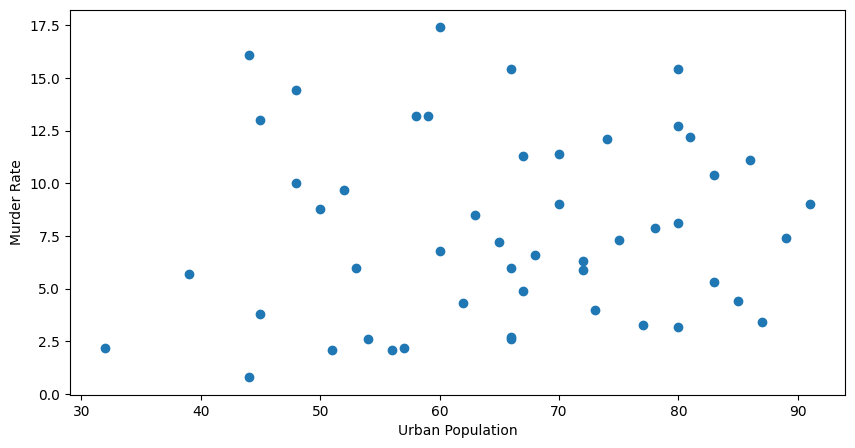

In [29]:
#scatter plot of UrbanPop and murder
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Assault Rate')

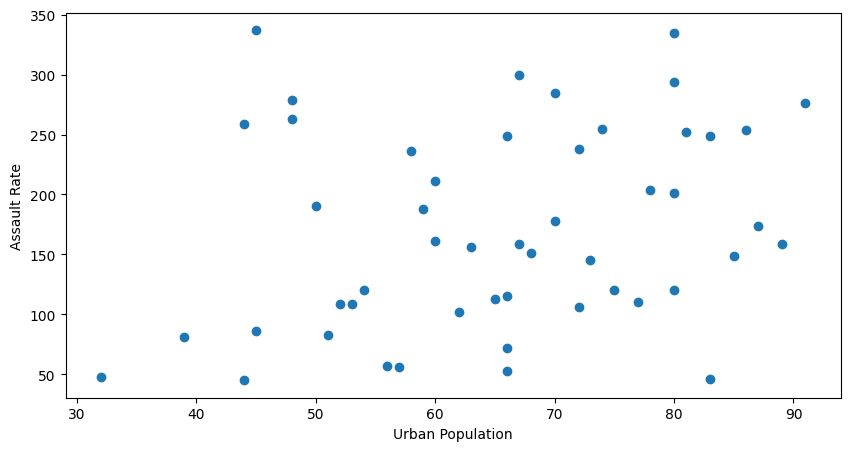

In [30]:
#scatter plot of UrbanPop and assualt
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

Text(0, 0.5, 'Rape')

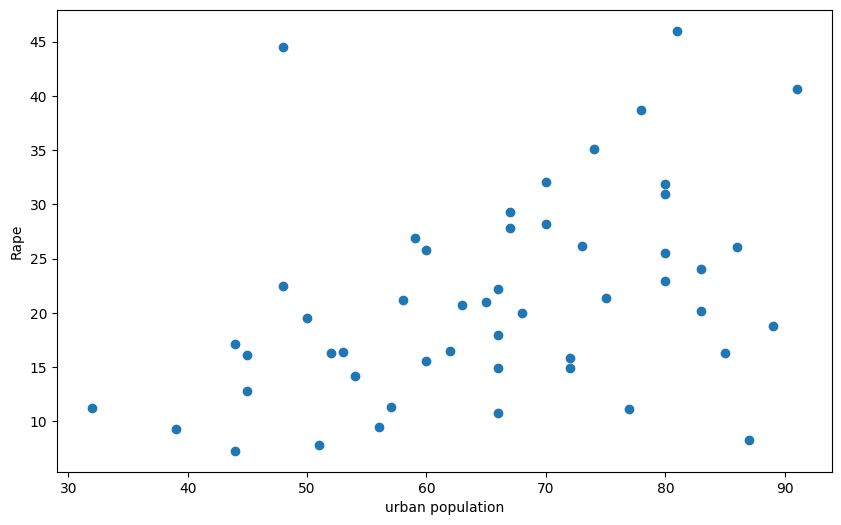

In [31]:
plt.figure(figsize=(10,6))
plt.scatter('UrbanPop','Rape',data=crime)
plt.xlabel('urban population')
plt.ylabel('Rape')

In [121]:
data = crime.iloc[:,1:].values
data

array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   0. ,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ,   2. ],
       [  9. , 276. ,  91. ,  40.6,   0. ,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   1. ,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   0. ,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   1. ,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   2. ],
       [  6. , 115. ,  66. ,  18. ,   1. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   1. ,   2. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ,   2. ],
       [ 11.3, 300. ,  67. ,  2

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [40]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'Euclidean distances')

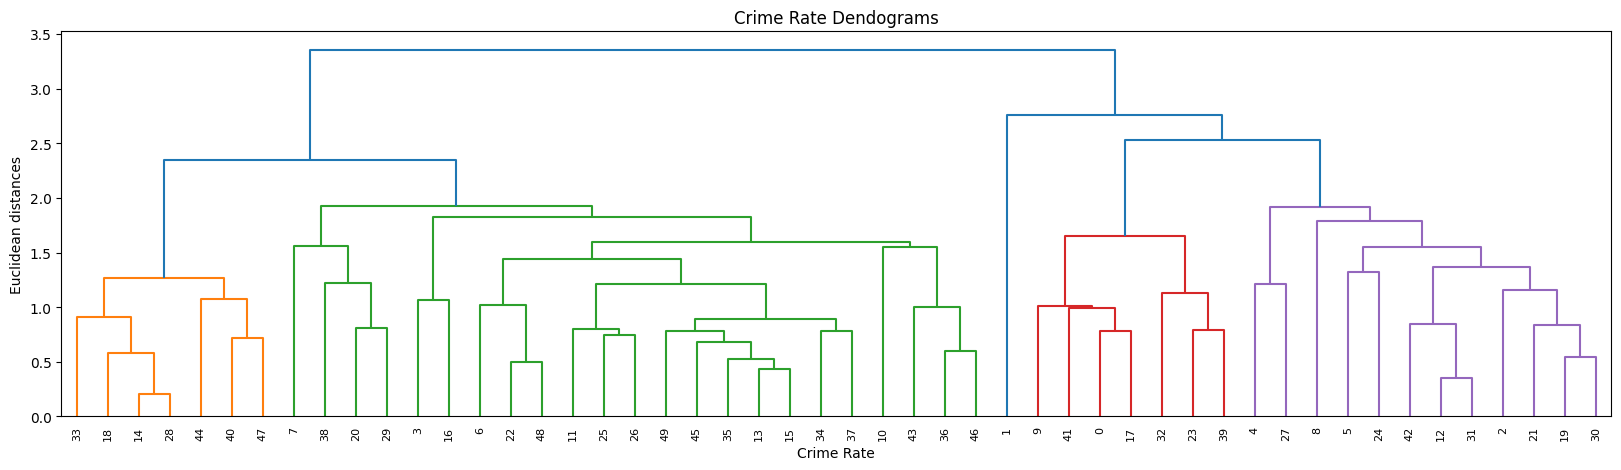

In [43]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average')) # linkage types 'single' 'average' 'complete'
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

1) Single Leakage:(min distance)

The distance between 2 clusters is defined as the shortest distance between points in the two clusters

2) Complete Linkage:(max distance)

The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

3) Average Linkage:(average distance)

The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.

4) Ward linkage:

This method defines the distance between two clusters as the increase in the sum of squares when the two clusters are merged.

In [44]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [84]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(scaled_data)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [85]:
# Fetch the cluster labels
crime['cluster labels']= y_pred

In [86]:
crime.sample(n=10)

,State,Murder,Assault,UrbanPop,Rape,cluster labels,kmeans_labels
49,Wyoming,6.8,161,60,15.6,1,0
16,Kentucky,9.7,109,52,16.3,1,1
37,Pennsylvania,6.3,106,72,14.9,1,1
10,Hawaii,5.3,46,83,20.2,1,1
33,North Dakota,0.8,45,44,7.3,2,1
29,New Jersey,7.4,159,89,18.8,1,0
21,Michigan,12.1,255,74,35.1,0,2
1,Alaska,10.0,263,48,44.5,0,2
35,Oklahoma,6.6,151,68,20.0,1,0
24,Missouri,9.0,178,70,28.2,1,0


In [87]:
# Let's see which State falls in which cluster
crime[['State','cluster labels']]

,State,cluster labels
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,1
8,Florida,0
9,Georgia,0


### Observations:
The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

The Cities in Cluster-3 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone

In [88]:
Safe_Zone= crime.groupby('cluster labels')['State'].unique()[0]
Safe_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado',
       'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina', 'Tennessee', 'Texas'],
      dtype=object)

In [89]:
Danger_Zone= crime.groupby('cluster labels')['State'].unique()[1]
Danger_Zone

array(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana',
       'Kansas', 'Kentucky', 'Massachusetts', 'Missouri', 'New Jersey',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'Utah', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

In [90]:
Moderate_Zone= crime.groupby('cluster labels')['State'].unique()[2]
Moderate_Zone

array(['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont',
       'West Virginia', 'Wisconsin'], dtype=object)

In [93]:
from sklearn.metrics import silhouette_score
agg_silhouette = silhouette_score(scaled_data,y_pred)

In [94]:
agg_silhouette

0.31036358174027895

## K- means

In [60]:
from sklearn.cluster import KMeans

In [95]:
# perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_labels 

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [103]:
# evaluate KMeans clustering
print("KMeans Clustering:")
print("Silhouette Score: ", silhouette_score(scaled_data, kmeans_labels))
print("Number of clusters: ", len(np.unique(kmeans_labels)))

KMeans Clustering:
Silhouette Score:  0.30813622648945616
Number of clusters:  3


In [104]:
crime['kmeans_labels']=kmeans_labels

In [105]:
crime[['State','kmeans_labels']]

,State,kmeans_labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,1
6,Connecticut,0
7,Delaware,0
8,Florida,1
9,Georgia,1


In [106]:
Safe_Zone_k= crime.groupby('kmeans_labels')['State'].unique()[0]
Safe_Zone_k

array(['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas',
       'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington',
       'Wyoming'], dtype=object)

In [107]:
modrate_Zone_k= crime.groupby('kmeans_labels')['State'].unique()[1]
modrate_Zone_k

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado',
       'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico',
       'New York', 'North Carolina', 'South Carolina', 'Tennessee',
       'Texas'], dtype=object)

In [108]:
danger_zone_K=crime.groupby('kmeans_labels')['State'].unique()[2]
danger_zone_K

array(['Arkansas', 'Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota',
       'Montana', 'Nebraska', 'New Hampshire', 'North Dakota',
       'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [109]:
crime

,State,Murder,Assault,UrbanPop,Rape,cluster labels,kmeans_labels
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,0,1


### DBSCAN

In [110]:
from sklearn.cluster import DBSCAN

In [122]:
# perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan= dbscan.fit(scaled_data)
dbscan

DBSCAN(eps=2)

In [123]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)